In [1]:
import sys
sys.path.append("..")

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from utils import *
from neural_utils import *

In [2]:
# load inputs
CFG_LOTTO_NUMBER_MAX = 50 
CFG_USED_NUMBERS_COUNT = 5
CFG_SIZE_IN = CFG_LOTTO_NUMBER_MAX + 1
CFG_SIZE_OUT = CFG_LOTTO_NUMBER_MAX + 1

#
X, Y, DB = load_inputs_and_outputs(load_db(os.path.join("../database", "lottoDB")), CFG_SIZE_IN, CFG_SIZE_OUT, CFG_USED_NUMBERS_COUNT)


In [3]:
'''Create model
'''

# Define input and output shapes
input_shape = (CFG_SIZE_IN,)
model = Sequential()

# in
model.add(Dense(50, activation='sigmoid', input_shape=input_shape))

# Add a Dense layer with x units and ReLU activation function
model.add(Dense(50, activation='sigmoid'))

# Add a Dense layer with x units and ReLU activation function
model.add(Dense(50, activation='sigmoid'))


# Add a Dense layer with x units and ReLU activation function
model.add(Dense(50, activation='sigmoid'))

# out
model.add(Dense(CFG_SIZE_OUT, activation='relu'))

# compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


Epoch 1/1000
22/22 [==============================] - 0s 14ms/step - loss: 0.0911 - accuracy: 0.0566 - val_loss: 0.0910 - val_accuracy: 0.0464
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.0450 - val_loss: 0.0910 - val_accuracy: 0.0552
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.0493 - val_loss: 0.0910 - val_accuracy: 0.0464
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.0581 - val_loss: 0.0909 - val_accuracy: 0.0537
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.0435 - val_loss: 0.0909 - val_accuracy: 0.0552
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.0508 - val_loss: 0.0909 - val_accuracy: 0.0508
Epoch 7/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.0479 - val_loss: 0.0909 - val_accuracy: 0.0552
Epoch

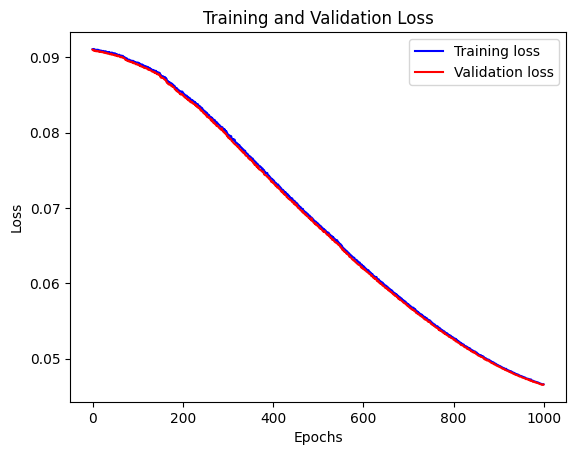

In [9]:

def train_model(feedback_model, weights_name, x_train, y_train, X_test, y_test, epochs=100):
    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=100,
        restore_best_weights=True
    )

    # Train the model
    history = feedback_model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Save the trained model weights
    feedback_model.save_weights(weights_name)

    # Visualize the loss
    visualize_loss(history, "Training and Validation Loss")
    return history

# Load values
CFG_WEIGHTS_NAME = 'model_weights-simple.h5'
CFG_OVERRIDE = False
ITERATIONS_COUNT = 1000
if CFG_OVERRIDE or not os.path.exists(CFG_WEIGHTS_NAME):
    train_model(model, CFG_WEIGHTS_NAME, X, Y, X, Y, epochs=ITERATIONS_COUNT)
else:
    model.load_weights(CFG_WEIGHTS_NAME)


In [11]:
'''Predict next sequence based on input sequence
'''
# predict all
predictions = model.predict(X)

# print predictions for len-1
with open("../log/predictions-simple.txt", "w") as f:
    for i in range(len(Y)):
        p, x, y, db_in = predictions[i], X[i], Y[i], DB[i]

        if i + 1 < len(DB):
            db_next = DB[i+1]

            # Write to file
            f.write(f"#{i} {db_in} -> {db_next}\n")
            for idx__ in range(len(y)):
                if not (p[idx__]<0.01 and y[idx__] < 0.01):
                    f.write("(%d)%f %f \n"%(idx__, p[idx__],y[idx__]))


# stats
loss, accuracy = model.evaluate(X, Y)
#print(f"loss={loss:4.4f} accuracy={100*accuracy:4.4f}%")

# predict for most recent Y
indices = [-1]
predictions = model.predict([Y[i] for i in indices])
for i in indices:
    p =  predictions[i]

    log(f"# Predicted for {convert_inputs_to_numbers(Y[i])}")
    for idx__ in range(len(y)):
        if p[idx__] > 0.01:
            log(f"({idx__}){ p[idx__]:4.4f}\n")

1/1 [==============================] - 0s 33ms/step
19:03:18.119466 ## # Predicted for [6, 15, 21, 34, 48]
19:03:18.119466 ## (7)0.4055

19:03:18.119466 ## (17)0.4463

19:03:18.119466 ## (36)0.7478

19:03:18.119466 ## (40)0.1990

19:03:18.119466 ## (41)0.1105



: 